# Climatology generator demo output

## Date: 2 February 2024

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

#### required packages

In [1]:
import intake
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#more plotting
import matplotlib.dates as mdates

#### start a local Dask client

In [2]:
from dask.distributed import Client
#client = Client(threads_per_worker=1)
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40025,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:39921,Total threads: 2
Dashboard: /proxy/46687/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:41205,


#### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_path = '/g/data/es60/users/thomas_moore/clim_demo_results/monthly/'

In [9]:
stats = xr.open_mfdataset(data_path+'BRAN2020_temperature_stats.nc',parallel=True,chunks = {'st_ocean':51, 'yt_ocean':1500, 'xt_ocean':360})
climatology = xr.open_mfdataset(data_path+'BRAN2020_temperature_climatology.nc',parallel=True,chunks = {'month':1,'st_ocean':10, 'yt_ocean':1500, 'xt_ocean':3600})
quant = xr.open_mfdataset(data_path+'BRAN2020_temperature_quant.nc',parallel=True,chunks = {'quantile':2,'st_ocean':1, 'yt_ocean':1500, 'xt_ocean':3600})

In [10]:
stats

<xarray.Dataset>
Dimensions:              (st_ocean: 51, yt_ocean: 1500, xt_ocean: 3600)
Coordinates:
  * st_ocean             (st_ocean) float64 2.5 7.5 12.5 ... 3.603e+03 4.509e+03
  * xt_ocean             (xt_ocean) float64 0.05 0.15 0.25 ... 359.8 359.9 360.0
  * yt_ocean             (yt_ocean) float64 -74.95 -74.85 -74.75 ... 74.85 74.95
Data variables: (12/15)
    mean_temp            (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    median_temp          (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    max_temp             (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    min_temp             (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    std_temp             (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    El_Nino_mean_temp    (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    ...                   ...
    El_Nino_std_temp     (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_mean_temp    (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_median_temp  (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_max_temp     (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_min_temp     (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>
    La_Nina_std_temp     (st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(51, 1500, 360), meta=np.ndarray>

In [11]:
climatology

<xarray.Dataset>
Dimensions:                      (month: 12, st_ocean: 51, yt_ocean: 1500,
                                  xt_ocean: 3600)
Coordinates:
  * st_ocean                     (st_ocean) float64 2.5 7.5 ... 4.509e+03
  * xt_ocean                     (xt_ocean) float64 0.05 0.15 ... 359.9 360.0
  * yt_ocean                     (yt_ocean) float64 -74.95 -74.85 ... 74.95
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    climatological_temp          (month, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 10, 1500, 3600), meta=np.ndarray>
    El_Nino_climatological_temp  (month, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 10, 1500, 3600), meta=np.ndarray>
    La_Nina_climatological_temp  (month, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 10, 1500, 3600), meta=np.ndarray>
Attributes: (12/13)
    NumFilesInSet:                   20
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    grid_tile:                       N/A
    grid_type:                       regular
    intake_esm_attrs:_data_format_:  netcdf
    ...                              ...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:time_period:    month
    intake_esm_attrs:variable:       temp
    intake_esm_dataset_key:          ocean.month
    intake_esm_vars:                 temp
    title:                           BRAN2020

In [12]:
quant

<xarray.Dataset>
Dimensions:                (st_ocean: 51, quantile: 2, yt_ocean: 1500,
                            xt_ocean: 3600)
Coordinates:
  * st_ocean               (st_ocean) float64 2.5 7.5 ... 3.603e+03 4.509e+03
  * xt_ocean               (xt_ocean) float64 0.05 0.15 0.25 ... 359.9 360.0
  * yt_ocean               (yt_ocean) float64 -74.95 -74.85 ... 74.85 74.95
  * quantile               (quantile) float64 0.05 0.95
Data variables:
    quantile_temp          (quantile, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(2, 1, 1500, 3600), meta=np.ndarray>
    El_Nino_quantile_temp  (quantile, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(2, 1, 1500, 3600), meta=np.ndarray>
    La_Nina_quantile_temp  (quantile, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(2, 1, 1500, 3600), meta=np.ndarray>

In [13]:
SST = climatology.climatological_temp.isel(st_ocean=0).compute()
SST_LN = climatology.La_Nina_climatological_temp.isel(st_ocean=0).compute()
SST_EN = climatology.El_Nino_climatological_temp.isel(st_ocean=0).compute()

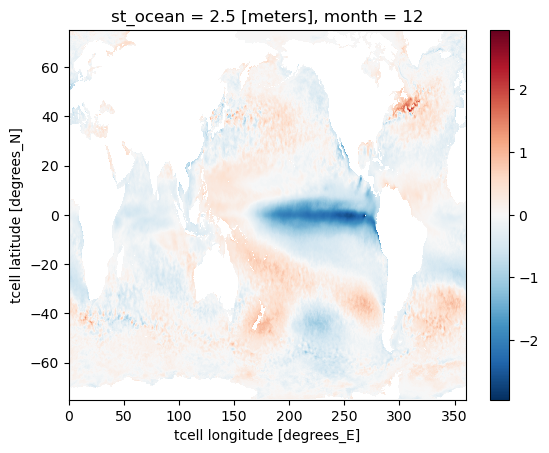

In [17]:
(SST.isel(month=11) - SST_EN.isel(month=11)).plot()

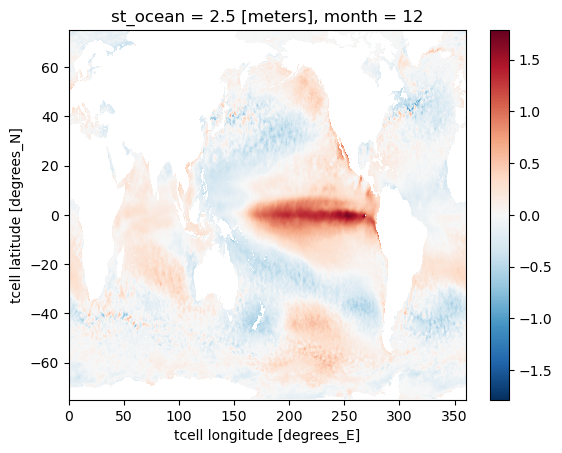

In [18]:
(SST.isel(month=11) - SST_LN.isel(month=11)).plot()

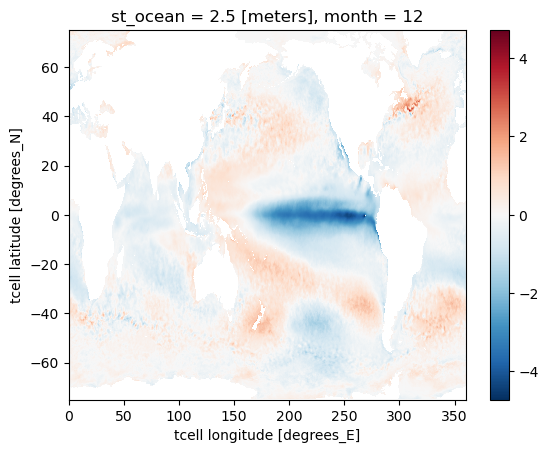

In [19]:
(SST_LN.isel(month=11) - SST_EN.isel(month=11)).plot()

# $The\ End\ \varnothing$

## Plot current vectors for August

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from matplotlib import mlab, cm, gridspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline 

In [ ]:
%%time
# Define the u and v components of the currents
time_choice = 8
u = clim_uv.u.sel(month=time_choice)
v = clim_uv.v.sel(month=time_choice)
speed = np.sqrt(u**2 + v**2)

In [ ]:
#plot model data
transform = ccrs.PlateCarree()
cmap = 'Spectral_r'
cbar_label='current speed'
plot_data = speed

###
fig = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = plt.subplot(projection=ccrs.PlateCarree(180))
ax.set_extent([142,160, -25, -10], ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'))
ax.coastlines('50m',linewidth=0.5,edgecolor='grey')
plot_data.plot(transform=transform,cmap=cmap,cbar_kwargs={'label': cbar_label,'shrink':0.5},robust=True)

#plot u/v vectors
# Define the x and y coordinates
x = clim_uv.xu_ocean
y = clim_uv.yu_ocean
ax.quiver(x.values,y.values,u.values,v.values,transform=transform, units='x', width=0.01, scale=0.7, headwidth=2,alpha=0.2)
ax.set_title('BRAN2020 1993-2022\ncurrent speed \n August Climatology')